<div align="center">
<img src="https://www.cuc.edu.co/wp-content/uploads/2024/03/logo_cuc.png" alt="Logo CUC" width="300"/>
</div>

# CUC - UNIVERSIDAD DE LA COSTA
## Departamento de Ciencias de la Computación y Electrónica
## Materia: Data Mining

## **Unidad 2:**
###             ACTIVIDAD I: APRENDIZAJE SUPERVISADO vs. NO SUPERVISADO


### Presentado por:

- **Jesus Gabriel Gudiño Lara**

- **Ana Rosa Ramirez Lopez**

---

**Objetivos de aprendizaje: Al finalizar esta actividad, el estudiante será capaz de:**

- a. Explicar los conceptos básicos de los modelos de aprendizaje supervisado y no supervisado en Machine Learning.
- b. Diferenciar entre modelos de regresión y clasificación e identificar sus casos de uso apropiados.
- c. Seleccionar y justificar el modelo de Machine Learning más adecuado para un problema del mundo real.
- d. Describir, a nivel teórico, cómo funciona el modelo seleccionado y sus posibles limitaciones.

---

La universidad está preocupada por las altas tasas de deserción estudiantil en los programas de pregrado. La institución busca diseñar un sistema que pueda identificar, de manera temprana, qué estudiantes tienen un mayor riesgo de abandonar sus estudios durante su primer año académico. Esto permitiría a la universidad implementar estrategias de apoyo y retención focalizadas.

La información disponible incluye datos históricos de estudiantes pasados:

- **Datos demográficos:** edad, género, lugar de origen.

- **Datos académicos:** promedio de notas de bachillerato, resultados del examen de admisión, calificaciones del primer semestre.

- **Datos financieros:** nivel socioeconómico, becas, préstamos o ayudas financieras.

**El objetivo de esta actividad es analizar este caso y responder: ¿Qué modelo de aprendizaje automático (machine learning) sería el más apropiado para predecir si un estudiante desertará (sí/no)?**



---




## 2. Creación de un conjunto de datos sintético (30%)

In [1]:
#Importamos librerias necesarias

import pandas as pd
import numpy as np

print("Librerías importadas correctamente!")

Librerías importadas correctamente!


In [2]:
# Definimos el número de registros
num_records = 500

# Creamos el diccionario con los datos sintéticos
data = {
    # Datos Demográficos
    'edad': np.random.randint(17, 25, size=num_records),
    'genero': np.random.choice(['Masculino', 'Femenino'], size=num_records, p=[0.52, 0.48]),
    'lugar_origen': np.random.choice(['Urbano', 'Rural'], size=num_records, p=[0.7, 0.3]),

    # Datos Académicos
    'promedio_bachillerato': np.random.uniform(7.0, 10.0, size=num_records).round(2),
    'puntaje_admision': np.random.randint(800, 1300, size=num_records),
    'calificaciones_primer_semestre': np.random.uniform(5.0, 10.0, size=num_records).round(2),

    # Datos Financieros
    'nivel_socioeconomico': np.random.choice(['Bajo', 'Medio', 'Alto'], size=num_records, p=[0.4, 0.5, 0.1]),
    'tiene_beca': np.random.choice(['Sí', 'No'], size=num_records, p=[0.35, 0.65]),
    'tiene_credito': np.random.choice(['Sí', 'No'], size=num_records, p=[0.4, 0.6])
}

# Creamos el DataFrame
df = pd.DataFrame(data)

print("DataFrame inicial creado con éxito.")
df.head()

DataFrame inicial creado con éxito.


,edad,genero,lugar_origen,promedio_bachillerato,puntaje_admision,calificaciones_primer_semestre,nivel_socioeconomico,tiene_beca,tiene_credito
0,18,Masculino,Rural,9.94,1237,5.80,Medio,No,Sí
1,20,Masculino,Urbano,7.51,1124,8.37,Bajo,No,No
2,20,Femenino,Urbano,9.67,1047,9.23,Bajo,Sí,No
3,24,Femenino,Urbano,8.46,1176,5.39,Bajo,No,Sí
4,24,Masculino,Urbano,9.29,895,6.57,Medio,No,No


In [3]:
# Creamos una 'puntuación de riesgo' para hacer la deserción más realista
# A menor calificación y nivel bajo/sin beca, mayor riesgo
riesgo = (10 - df['calificaciones_primer_semestre']) + \
         (1300 - df['puntaje_admision']) / 100 + \
         (df['nivel_socioeconomico'] == 'Bajo') * 2 + \
         (df['tiene_beca'] == 'No') * 1.5

# Normalizamos el riesgo para que sea una probabilidad entre 0 y 1
prob_desercion = riesgo / riesgo.max()

# Generamos la deserción basándonos en esa probabilidad
df['desercion'] = np.random.binomial(1, prob_desercion, size=num_records)

# Convertimos el resultado a 'Sí'/'No'
df['desercion'] = df['desercion'].map({1: 'Sí', 0: 'No'})

print("Variable objetivo 'desercion' creada.")
print(df['desercion'].value_counts())
df.head()

Variable objetivo 'desercion' creada.
desercion
No    251
Sí    249
Name: count, dtype: int64


,edad,genero,lugar_origen,promedio_bachillerato,puntaje_admision,calificaciones_primer_semestre,nivel_socioeconomico,tiene_beca,tiene_credito,desercion
0,18,Masculino,Rural,9.94,1237,5.80,Medio,No,Sí,Sí
1,20,Masculino,Urbano,7.51,1124,8.37,Bajo,No,No,No
2,20,Femenino,Urbano,9.67,1047,9.23,Bajo,Sí,No,No
3,24,Femenino,Urbano,8.46,1176,5.39,Bajo,No,Sí,No
4,24,Masculino,Urbano,9.29,895,6.57,Medio,No,No,No


In [4]:
# Introducir 5% de valores nulos en 'promedio_bachillerato'
num_nulos = int(num_records * 0.05)
indices_nulos = np.random.choice(df.index, num_nulos, replace=False)
df.loc[indices_nulos, 'promedio_bachillerato'] = np.nan

# Introducir 8% de valores nulos en 'nivel_socioeconomico'
num_nulos_socio = int(num_records * 0.08)
indices_nulos_socio = np.random.choice(df.index, num_nulos_socio, replace=False)
df.loc[indices_nulos_socio, 'nivel_socioeconomico'] = np.nan

print("Valores nulos introducidos.")
df.isnull().sum()

Valores nulos introducidos.


edad                               0
genero                             0
lugar_origen                       0
promedio_bachillerato             25
puntaje_admision                   0
calificaciones_primer_semestre     0
nivel_socioeconomico              40
tiene_beca                         0
tiene_credito                      0
desercion                          0
dtype: int64

In [5]:
# Introducir 3 outliers con calificaciones muy bajas
num_outliers = 3
indices_outliers_bajos = np.random.choice(df.index, num_outliers, replace=False)
df.loc[indices_outliers_bajos, 'calificaciones_primer_semestre'] = np.random.uniform(0.0, 2.5, size=num_outliers).round(2)

# Introducir 2 outliers con puntajes de admisión imposibles (ej. error de tipeo)
indices_outliers_altos = np.random.choice(df.drop(indices_outliers_bajos).index, 2, replace=False)
df.loc[indices_outliers_altos, 'puntaje_admision'] = np.random.randint(1500, 1600, size=2)

print("Valores atípicos introducidos.")
df.describe()

Valores atípicos introducidos.


,edad,promedio_bachillerato,puntaje_admision,calificaciones_primer_semestre
count,500.000000,475.000000,500.000000,500.000000
mean,20.608000,8.444737,1050.628000,7.508140
std,2.284025,0.872205,150.667339,1.514746
min,17.000000,7.010000,801.000000,0.210000
25%,19.000000,7.720000,922.000000,6.290000
50%,21.000000,8.390000,1052.000000,7.640000
75%,23.000000,9.235000,1180.000000,8.810000
max,24.000000,9.980000,1589.000000,10.000000


In [6]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('dataset_desercion_estudiantil.csv', index=False)

print("El archivo 'dataset_desercion_estudiantil.csv' ha sido guardado exitosamente.")

El archivo 'dataset_desercion_estudiantil.csv' ha sido guardado exitosamente.


In [7]:
# Ahora se necesit hacer un readme para gitub


# BONUS: Clasificacion

In [8]:
# Importación de librerías esenciales
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [9]:

# Cargar el dataset desde el archivo CSV
# Asegúrate de que el archivo 'dataset_desercion_estudiantil.csv' esté en la misma carpeta que tu notebook.
try:
    df = pd.read_csv('dataset_desercion_estudiantil.csv')
    print("Dataset cargado exitosamente.")
    print("Primeras 5 filas del dataset:")
    print(df.head())
    print("\nInformación general del dataset:")
    df.info()
except FileNotFoundError:
    print("Error: El archivo 'dataset_desercion_estudiantil.csv' no se encontró.")
    print("Asegúrate de haber corrido primero el script de creación de datos o de tener el archivo en la misma carpeta.")

Dataset cargado exitosamente.
Primeras 5 filas del dataset:
   edad     genero lugar_origen  promedio_bachillerato  puntaje_admision  \
0    18  Masculino        Rural                   9.94              1237   
1    20  Masculino       Urbano                   7.51              1124   
2    20   Femenino       Urbano                   9.67              1047   
3    24   Femenino       Urbano                   8.46              1176   
4    24  Masculino       Urbano                   9.29               895   

   calificaciones_primer_semestre nivel_socioeconomico tiene_beca  \
0                            5.80                Medio         No   
1                            8.37                 Bajo         No   
2                            9.23                 Bajo         Sí   
3                            5.39                 Bajo         No   
4                            6.57                Medio         No   

  tiene_credito desercion  
0            Sí        Sí  
1           

## Paso 2: Preprocesamiento de Datos

Las máquinas no entienden de "Sí", "No" o "Nivel Bajo". Debemos preparar los datos: limpiar valores nulos y convertir todo a números. Este es quizás el paso más importante

In [10]:
# Hacemos una copia para no modificar el dataframe original
df_procesado = df.copy()

# 1. Manejo de Valores Nulos (Imputación)
# Para variables numéricas, llenaremos los nulos con la mediana.
# Para variables categóricas, usaremos la moda (el valor más frecuente).
for column in df_procesado.select_dtypes(include=np.number).columns:
    df_procesado[column].fillna(df_procesado[column].median(), inplace=True)

for column in df_procesado.select_dtypes(include='object').columns:
    df_procesado[column].fillna(df_procesado[column].mode()[0], inplace=True)

print("Valores nulos después de la imputación:")
print(df_procesado.isnull().sum())


# 2. Codificación de Variables Categóricas
# Primero, separamos las características (X) de la variable objetivo (y)
X = df_procesado.drop('desercion', axis=1)
y = df_procesado['desercion']

# Codificamos la variable objetivo ('Sí'/'No') a 1/0
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Usamos get_dummies para las características categóricas (One-Hot Encoding)
# Esto crea nuevas columnas para cada categoría, evitando que el modelo asuma un orden incorrecto.
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nDimensiones de X después de codificar:", X_encoded.shape)
print("Columnas de X después de codificar:")
print(X_encoded.columns)
print("\nVariable objetivo codificada (primeros 10 valores):")
print(y_encoded[:10])

Valores nulos después de la imputación:
edad                              0
genero                            0
lugar_origen                      0
promedio_bachillerato             0
puntaje_admision                  0
calificaciones_primer_semestre    0
nivel_socioeconomico              0
tiene_beca                        0
tiene_credito                     0
desercion                         0
dtype: int64

Dimensiones de X después de codificar: (500, 10)
Columnas de X después de codificar:
Index(['edad', 'promedio_bachillerato', 'puntaje_admision',
       'calificaciones_primer_semestre', 'genero_Masculino',
       'lugar_origen_Urbano', 'nivel_socioeconomico_Bajo',
       'nivel_socioeconomico_Medio', 'tiene_beca_Sí', 'tiene_credito_Sí'],
      dtype='object')

Variable objetivo codificada (primeros 10 valores):
[1 0 0 0 0 1 1 1 0 0]


## Paso 3: División del Dataset (Entrenamiento y Prueba)

Para evaluar nuestro modelo de forma justa, lo entrenamos con una parte de los datos y lo probamos con otra parte que nunca ha visto antes. Usaremos una división 80/20.


In [11]:
# División de datos en conjuntos de entrenamiento (80%) y prueba (20%)
# stratify=y_encoded asegura que la proporción de 'Sí' y 'No' sea la misma en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (400, 10)
Tamaño del conjunto de prueba: (100, 10)


## Paso 4: Entrenamiento del Modelo de Clasificación

Ahora, con los datos listos, entrenamos nuestro Árbol de Decisión. El método .fit() es donde el modelo "aprende" de los datos de entrenamiento.

Perspectiva Alternativa: Elegimos el Árbol de Decisión por su interpretabilidad. Si nuestro único objetivo fuera la máxima precisión predictiva, podríamos considerar modelos más complejos como Random Forest o Gradient Boosting, que suelen ofrecer un mejor rendimiento a costa de ser más difíciles de interpretar.

In [12]:
# Inicialización del modelo de Árbol de Decisión
# random_state=42 asegura que el resultado sea reproducible
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenamiento del modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

print("¡Modelo de Árbol de Decisión entrenado con éxito!")

¡Modelo de Árbol de Decisión entrenado con éxito!


## Paso 5: Evaluación del Modelo

Un modelo entrenado no sirve de nada si no sabemos qué tan bueno es. Lo evaluamos usando los datos de prueba.

In [13]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# 1. Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# 2. Matriz de Confusión
# Nos dice cuántos aciertos y errores hubo por cada clase.
print("\nMatriz de Confusión:")
# [[Verdaderos Negativos, Falsos Positivos],
#  [Falsos Negativos,   Verdaderos Positivos]]
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 3. Reporte de Clasificación
# Muestra métricas clave como Precisión, Recall y F1-score.
# - Precisión: De todos los que predijimos que desertarían, ¿cuántos realmente lo hicieron?
# - Recall (Sensibilidad): De todos los que realmente desertaron, ¿a cuántos logramos identificar?
print("\nReporte de Clasificación:")
class_report = classification_report(y_test, y_pred, target_names=label_encoder_y.classes_)
print(class_report)

Exactitud del modelo: 0.56

Matriz de Confusión:
[[26 24]
 [20 30]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.57      0.52      0.54        50
          Sí       0.56      0.60      0.58        50

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100



Visualizacion:

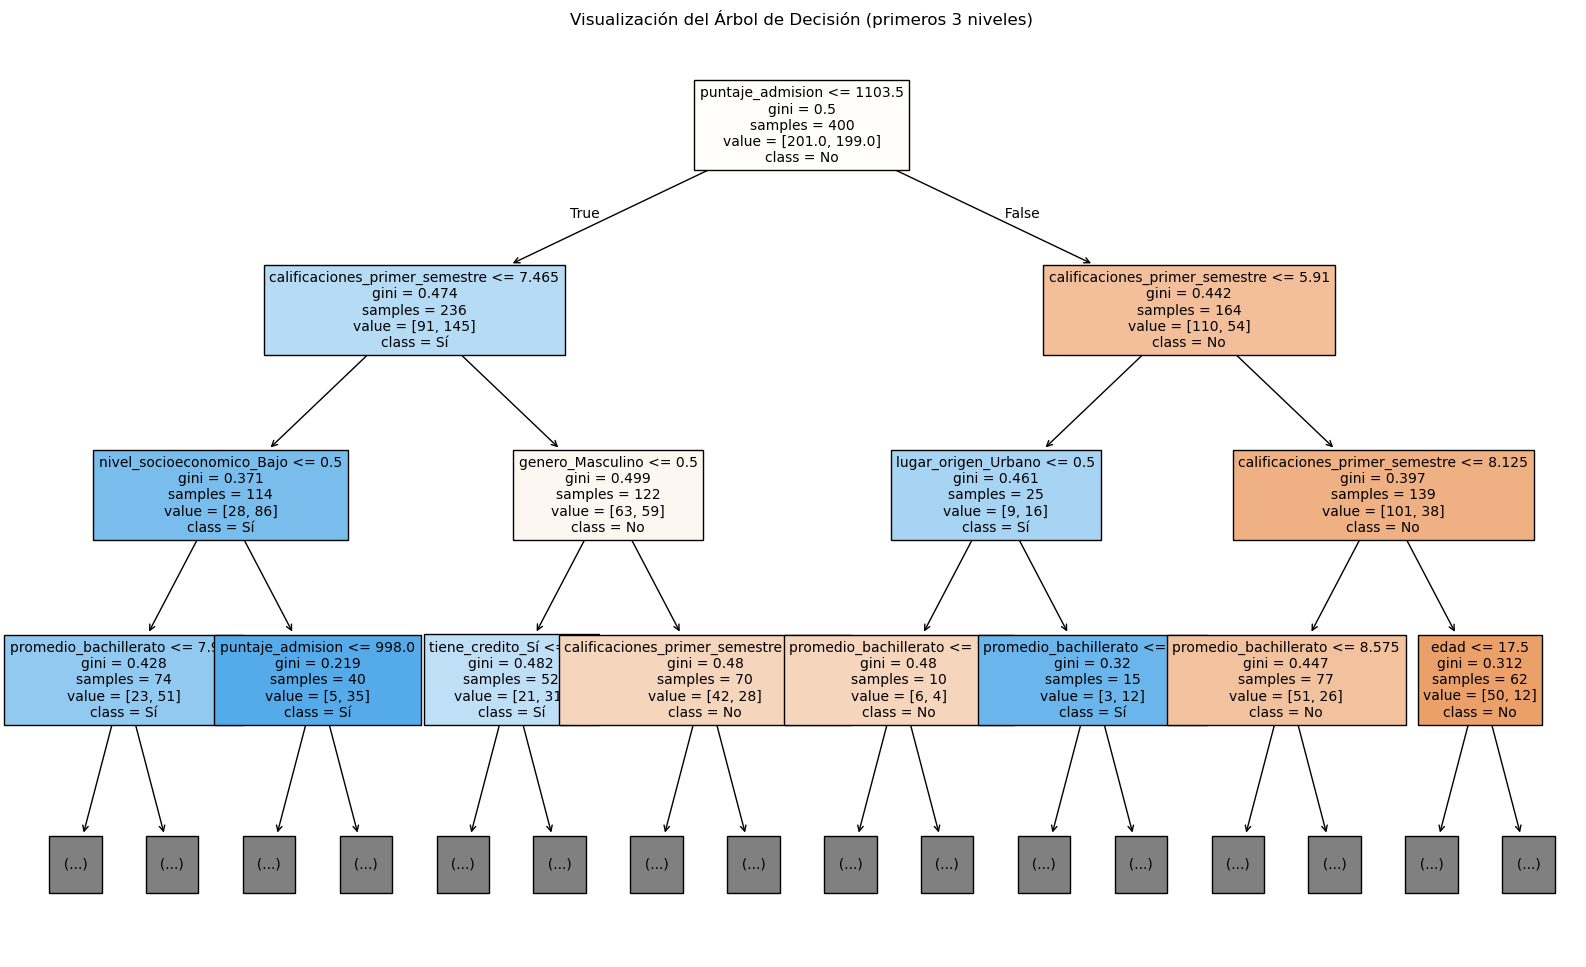


La visualización del árbol se ha guardado como 'arbol_de_decision.png'


In [14]:
# Visualización del Árbol de Decisión
plt.figure(figsize=(20,12))
plot_tree(
    modelo_arbol,
    filled=True,
    feature_names=X_encoded.columns,
    class_names=label_encoder_y.classes_,
    max_depth=3,  # Mostramos solo 3 niveles para que sea legible
    fontsize=10
)
plt.title("Visualización del Árbol de Decisión (primeros 3 niveles)")
plt.savefig("arbol_de_decision.png")
plt.show()

print("\nLa visualización del árbol se ha guardado como 'arbol_de_decision.png'")